In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
#1.- Crear el dataset de personajes (categórico)
data={
    "Nombre": ["Superman","Brad Pitt","Einstein","Harry Potter","Angelina Jolie","Sherlock Holmes"],
    "Real":["No","Si","Si","No","Si","No"],
    "Actor":["No","Si","No","No","Si","No"],
    "Poderes":["Si","No","No","Si","No","No"],
    "Clase":["Superheroe","Actor","Cientifico","Mago","Actriz","Ficción"]
}
df=pd.DataFrame(data)
print(f"Data set original: \n{df}")

Data set original: 
            Nombre Real Actor Poderes       Clase
0         Superman   No    No      Si  Superheroe
1        Brad Pitt   Si    Si      No       Actor
2         Einstein   Si    No      No  Cientifico
3     Harry Potter   No    No      Si        Mago
4   Angelina Jolie   Si    Si      No      Actriz
5  Sherlock Holmes   No    No      No     Ficción


In [4]:
#2.- Codificar varibales categoricas a numéricas
le=LabelEncoder()
df_encoded=df.copy()
for column in ["Real","Actor","Poderes","Clase"]:
    df_encoded[column]=le.fit_transform(df[column])
print(f"Data set codificado: \n{df_encoded}")

Data set codificado: 
            Nombre  Real  Actor  Poderes  Clase
0         Superman     0      0        1      5
1        Brad Pitt     1      1        0      0
2         Einstein     1      0        0      2
3     Harry Potter     0      0        1      4
4   Angelina Jolie     1      1        0      1
5  Sherlock Holmes     0      0        0      3


In [6]:
#3.- Separar caracteristicas (x) y target (y)
X= df_encoded.drop(["Nombre","Clase"],axis=1)
y=df_encoded["Clase"]

In [7]:
#4.-Entrenar el árbol de decisión con 103 (entropía)
md=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
md.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

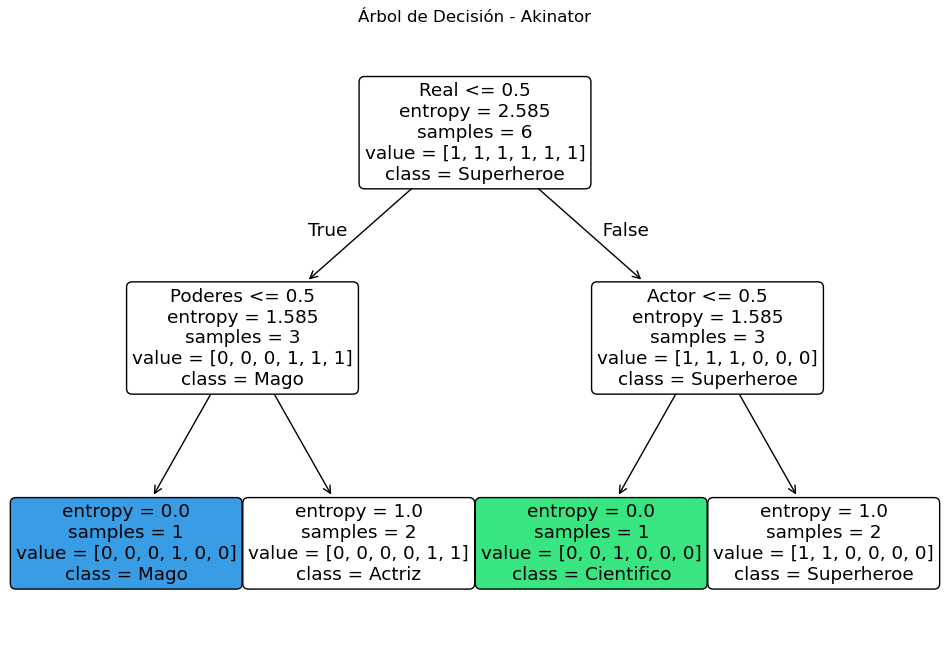

In [12]:
#5.-Visualizar el árbol (opcional)
plt.figure(figsize=(12,8))
plot_tree(
    md,
    feature_names=X.columns,
    class_names=df["Clase"].unique(),
    filled=True,
    rounded=True
)
plt.title("Árbol de Decisión - Akinator")
plt.show()

In [ ]:
#6.- Función para jugar (interactivo por consola)
def jugar_akinator(md,df):
    print("¡Piensa en un personaje de la lista y responde las preguntas!")
    personajes=df["Nombre"].tolist()#Lista de personajes. tolist() es una funcion de pandas que convierte una serie a lista
    #Iniciar respuesta
    respuestas={}
    for feature in X.columns:
        respuesta=input(f"¿{feature}? (Si/No): ").strip().lower()#Strip elimina espacios en blanco
        respuestas[feature]=1 if respuesta == "si" else 0 #Convierte la respuesta en 1 o 0

    #predecir
    input_user= pd.DataFrame([respuestas])#Crear un dataFrame con las respuestas del usuario
    prediccion= md.predict(input_user)#Predecir la clase del personaje
    clase_predicha=le.inverse_transform(prediccion)[0]#Invertir la codificación para obtener la clase original
    nombre_predicho=df[df["Clase"]==clase_predicha]["Nombre"].values[0]#obtener el nombre del personaje predicho
    print(f"\n¡Tu personaje es {nombre_predicho} ({clase_predicha})!")
#Ejecutar el juego
jugar_akinator(md,df)

¡Piensa en un personaje de la lista y responde las preguntas!


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Actor
- Poderes
